# # Review: Week 1, 2 and mid week 3

## ## Week 1

## I) Edge detection

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
dt = datasets.load_digits()

In [262]:
# print(dt.DESCR)

In [5]:
len(dt.data), len(dt.target), len(dt.target_names), len(dt.images)

(1797, 1797, 10, 1797)

In [6]:
dt.data.shape

(1797, 64)

In [7]:
dt.target.shape

(1797,)

In [8]:
dt.images.shape

(1797, 8, 8)

In [35]:
no1 = dt.images[1]
no1_target = dt.target[1]

print('vector:\n{}\nlabel:{}'.format(no1, no1_target))

vector:
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
label:1


The above array would look like something like this:

![](media/1.png)

*(Check below to see that I got that right lol)*

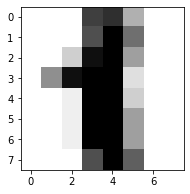

In [266]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

**Example: Vertical edge detection**

Define the edge detector:

In [197]:
v_edge_detector = np.array([
                        [1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]
])

Let's define helper functions:

In [239]:
# Walk over the picture

def stride(_image, _filter, add_stride):
    coords = []
    h = _image.shape[0]
    w = _image.shape[1]
    f_h = _filter.shape[0]
    f_w = _filter.shape[1]
    # Note that we don't need to set default stride value
    # of 1 because we are already iterating over the
    # lines and columns
    for line in range(h):
        for col in range(w):
            start = line, col
            end = line + f_h + add_stride, col + f_w + add_stride
            if end[0] <= h:
                if end[1] <=  w:
                    coords.append([start, end])
    return coords

In [240]:
# Perform the convolution
    
def conv(_image, _filter, add_stride, verbose=True):
    convs = []
    coords = stride(_image, _filter, add_stride)
    f_x = _filter.shape[0]
    f_y = _filter.shape[1]
    for c in coords:
        # start
        s_x = c[0][0]
        s_y = c[0][1]
        # end
        e_x = c[1][0]
        e_y = c[1][1]
        window = _image[s_x:e_x, s_y:e_y]
        conv = window * _filter
        det = np.sum(conv)
        convs.append(det)
        if verbose == True:
            print('Coords: {}'.format(c))
            print('Slice:\n{}'.format(window))
            print('Conv:\n{}'.format(conv))
            print('Sum: {}'.format(det) + '\n')
    # We need to save the results from each convolution
    # in our new convolution result matrix
    # The result matrix shall have height and width:
    # (h_prev - filter_h) + 1
    r_h = _image.shape[0] - f_x + 1
    r_w = _image.shape[1] - f_y + 1
    # No, fill in the values from the convolution
    # into the result matrix
    r = np.array(convs).reshape(r_h, r_w)
    return r

In [244]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

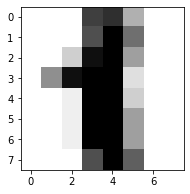

In [268]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [252]:
no1_conv_v = conv(no1, v_edge_detector, 0, False)
no1_conv_v

array([[ -3., -38., -42.,  18.,  45.,  20.],
       [-18., -35., -30.,  25.,  48.,  17.],
       [-19., -40., -29.,  36.,  48.,  11.],
       [-17., -41., -31.,  37.,  48.,  11.],
       [ -3., -48., -45.,  33.,  48.,  15.],
       [ -2., -43., -46.,  21.,  48.,  22.]])

Let's see it another way:

In [259]:
no1_conv_v > 0

array([[False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True]])

See how that capture's the vertical edge?

Let's try it again applying a horizontal edge detector:

In [254]:
h_edge_detector = v_edge_detector.T
h_edge_detector

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [263]:
no1

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

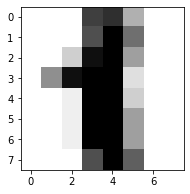

In [267]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [255]:
no1_conv_h = conv(no1, h_edge_detector, 0, False)

array([[ -3.,  -6.,  -9.,  -7.,  -4.,  -1.],
       [-22., -27., -20.,   2.,   7.,   7.],
       [  2.,   1.,   1.,   2.,   3.,   3.],
       [ 21.,  21.,  14.,  -4.,  -4.,  -4.],
       [  0.,   0.,   0.,  -3.,  -3.,  -3.],
       [  1.,   6.,   6.,   1.,  -4.,  -4.]])

In [260]:
no1_conv_h > 0

array([[False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False],
       [False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False]])

___

Let's do it for another number:

In [271]:
no3 = dt.images[13]
no3_target = dt.target[13]

print('vector:\n{}\nlabel:{}'.format(no3, no3_target))

vector:
[[ 0.  2.  9. 15. 14.  9.  3.  0.]
 [ 0.  4. 13.  8.  9. 16.  8.  0.]
 [ 0.  0.  0.  6. 14. 15.  3.  0.]
 [ 0.  0.  0. 11. 14.  2.  0.  0.]
 [ 0.  0.  0.  2. 15. 11.  0.  0.]
 [ 0.  0.  0.  0.  2. 15.  4.  0.]
 [ 0.  1.  5.  6. 13. 16.  6.  0.]
 [ 0.  2. 12. 12. 13. 11.  0.  0.]]
label:3


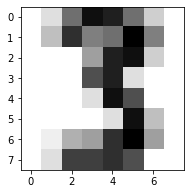

In [272]:
plt.figure(1, figsize=(3, 3))
plt.imshow(no3, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

![](media/3.png)

In [276]:
no3_conv_v = conv(no3, v_edge_detector, 0, False)
no3_conv_h = conv(no3, h_edge_detector, 0, False)

In [279]:
no3_conv_v

array([[-22., -23., -15., -11.,  23.,  40.],
       [-13., -21., -24.,  -8.,  26.,  33.],
       [  0., -19., -43.,  -9.,  40.,  28.],
       [  0., -13., -31., -15.,  27.,  28.],
       [ -5.,  -7., -25., -34.,  20.,  42.],
       [-17., -15., -11., -24.,  18.,  42.]])

In [277]:
no3_conv_v > 0

array([[False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True]])

In [280]:
no3_conv_h

array([[ 11.,  20.,  18.,   3.,  -6.,  -6.],
       [ 17.,  14.,   5.,   6.,  17.,  22.],
       [  0.,   4.,   3.,   7.,   6.,   7.],
       [  0.,  11.,  23.,  10.,  -5., -17.],
       [ -6., -10.,  -7.,  -7.,  -9., -11.],
       [-14., -26., -35., -19.,  -3.,   8.]])

In [281]:
no3_conv_h > 0

array([[ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False,  True,  True,  True, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False,  True]])

___